 Divya Gupta Indian Statistical institute Chennai

## Cancer Prediction


# We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:


1.Data Exploration
2.Exploratory Data Analysis (EDA)
3.Data Pre-processing
4.Data Manipulation
5.Feature Selection/Extraction
6.Predictive Modelling
7.Project Outcomes & Conclusion

In [2]:
#1. Data Exploration
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading DATA

In [3]:
data=pd.read_csv("Diagnosi1.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [5]:
#shape of the data
data.shape

(569, 32)

In [6]:
#information about data
data.info

<bound method DataFrame.info of             id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0     87139402         B        12.32         12.39           78.85   
1      8910251         B        10.60         18.95           69.28   
2       905520         B        11.04         16.83           70.92   
3       868871         B        11.28         13.39           73.00   
4      9012568         B        15.19         13.21           97.65   
..         ...       ...          ...           ...             ...   
564  911320502         B        13.17         18.22           84.28   
565     898677         B        10.26         14.71           66.20   
566     873885         M        15.28         22.41           98.92   
567     911201         B        14.53         13.98           93.86   
568    9012795         M        21.37         15.10          141.30   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        464.1          0.10280           0.06

In [7]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [8]:
data.nunique().sort_values()

diagnosis              2
smoothness_worst     411
symmetry_mean        432
radius_mean          456
radius_worst         457
smoothness_mean      474
texture_mean         479
points_worst         492
symmetry_se          498
dimension_mean       499
symmetry_worst       500
points_se            507
texture_worst        511
perimeter_worst      514
texture_se           519
perimeter_mean       522
area_se              528
compactness_worst    529
perimeter_se         533
concavity_se         533
dimension_worst      535
concavity_mean       537
compactness_mean     537
concavity_worst      539
area_mean            539
radius_se            540
compactness_se       541
points_mean          542
area_worst           544
dimension_se         545
smoothness_se        547
id                   569
dtype: int64

In [9]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# CHECKING MISSING VALUES

In [10]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

there is no missing value

In [11]:
#convert the value of M and B into 1 and 0
data['diagnosis']=data['diagnosis'].map({'B':0,'M':1})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


drop columns

In [12]:
y=data.diagnosis
drop_cols=['id','diagnosis']
x=data.drop(drop_cols,axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [13]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    1
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


In [14]:
#Get the count of malignant(M) and Benign(B)
B,M=y.value_counts()
print("Benign Tumours is ", B)
print("Malignant Tumours is ", M)

Benign Tumours is  357
Malignant Tumours is  212


In [46]:
B,M=y_resampled.value_counts()
print("Benign Tumours is ", B)
print("Malignant Tumours is ", M)

Benign Tumours is  357
Malignant Tumours is  357


In [17]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

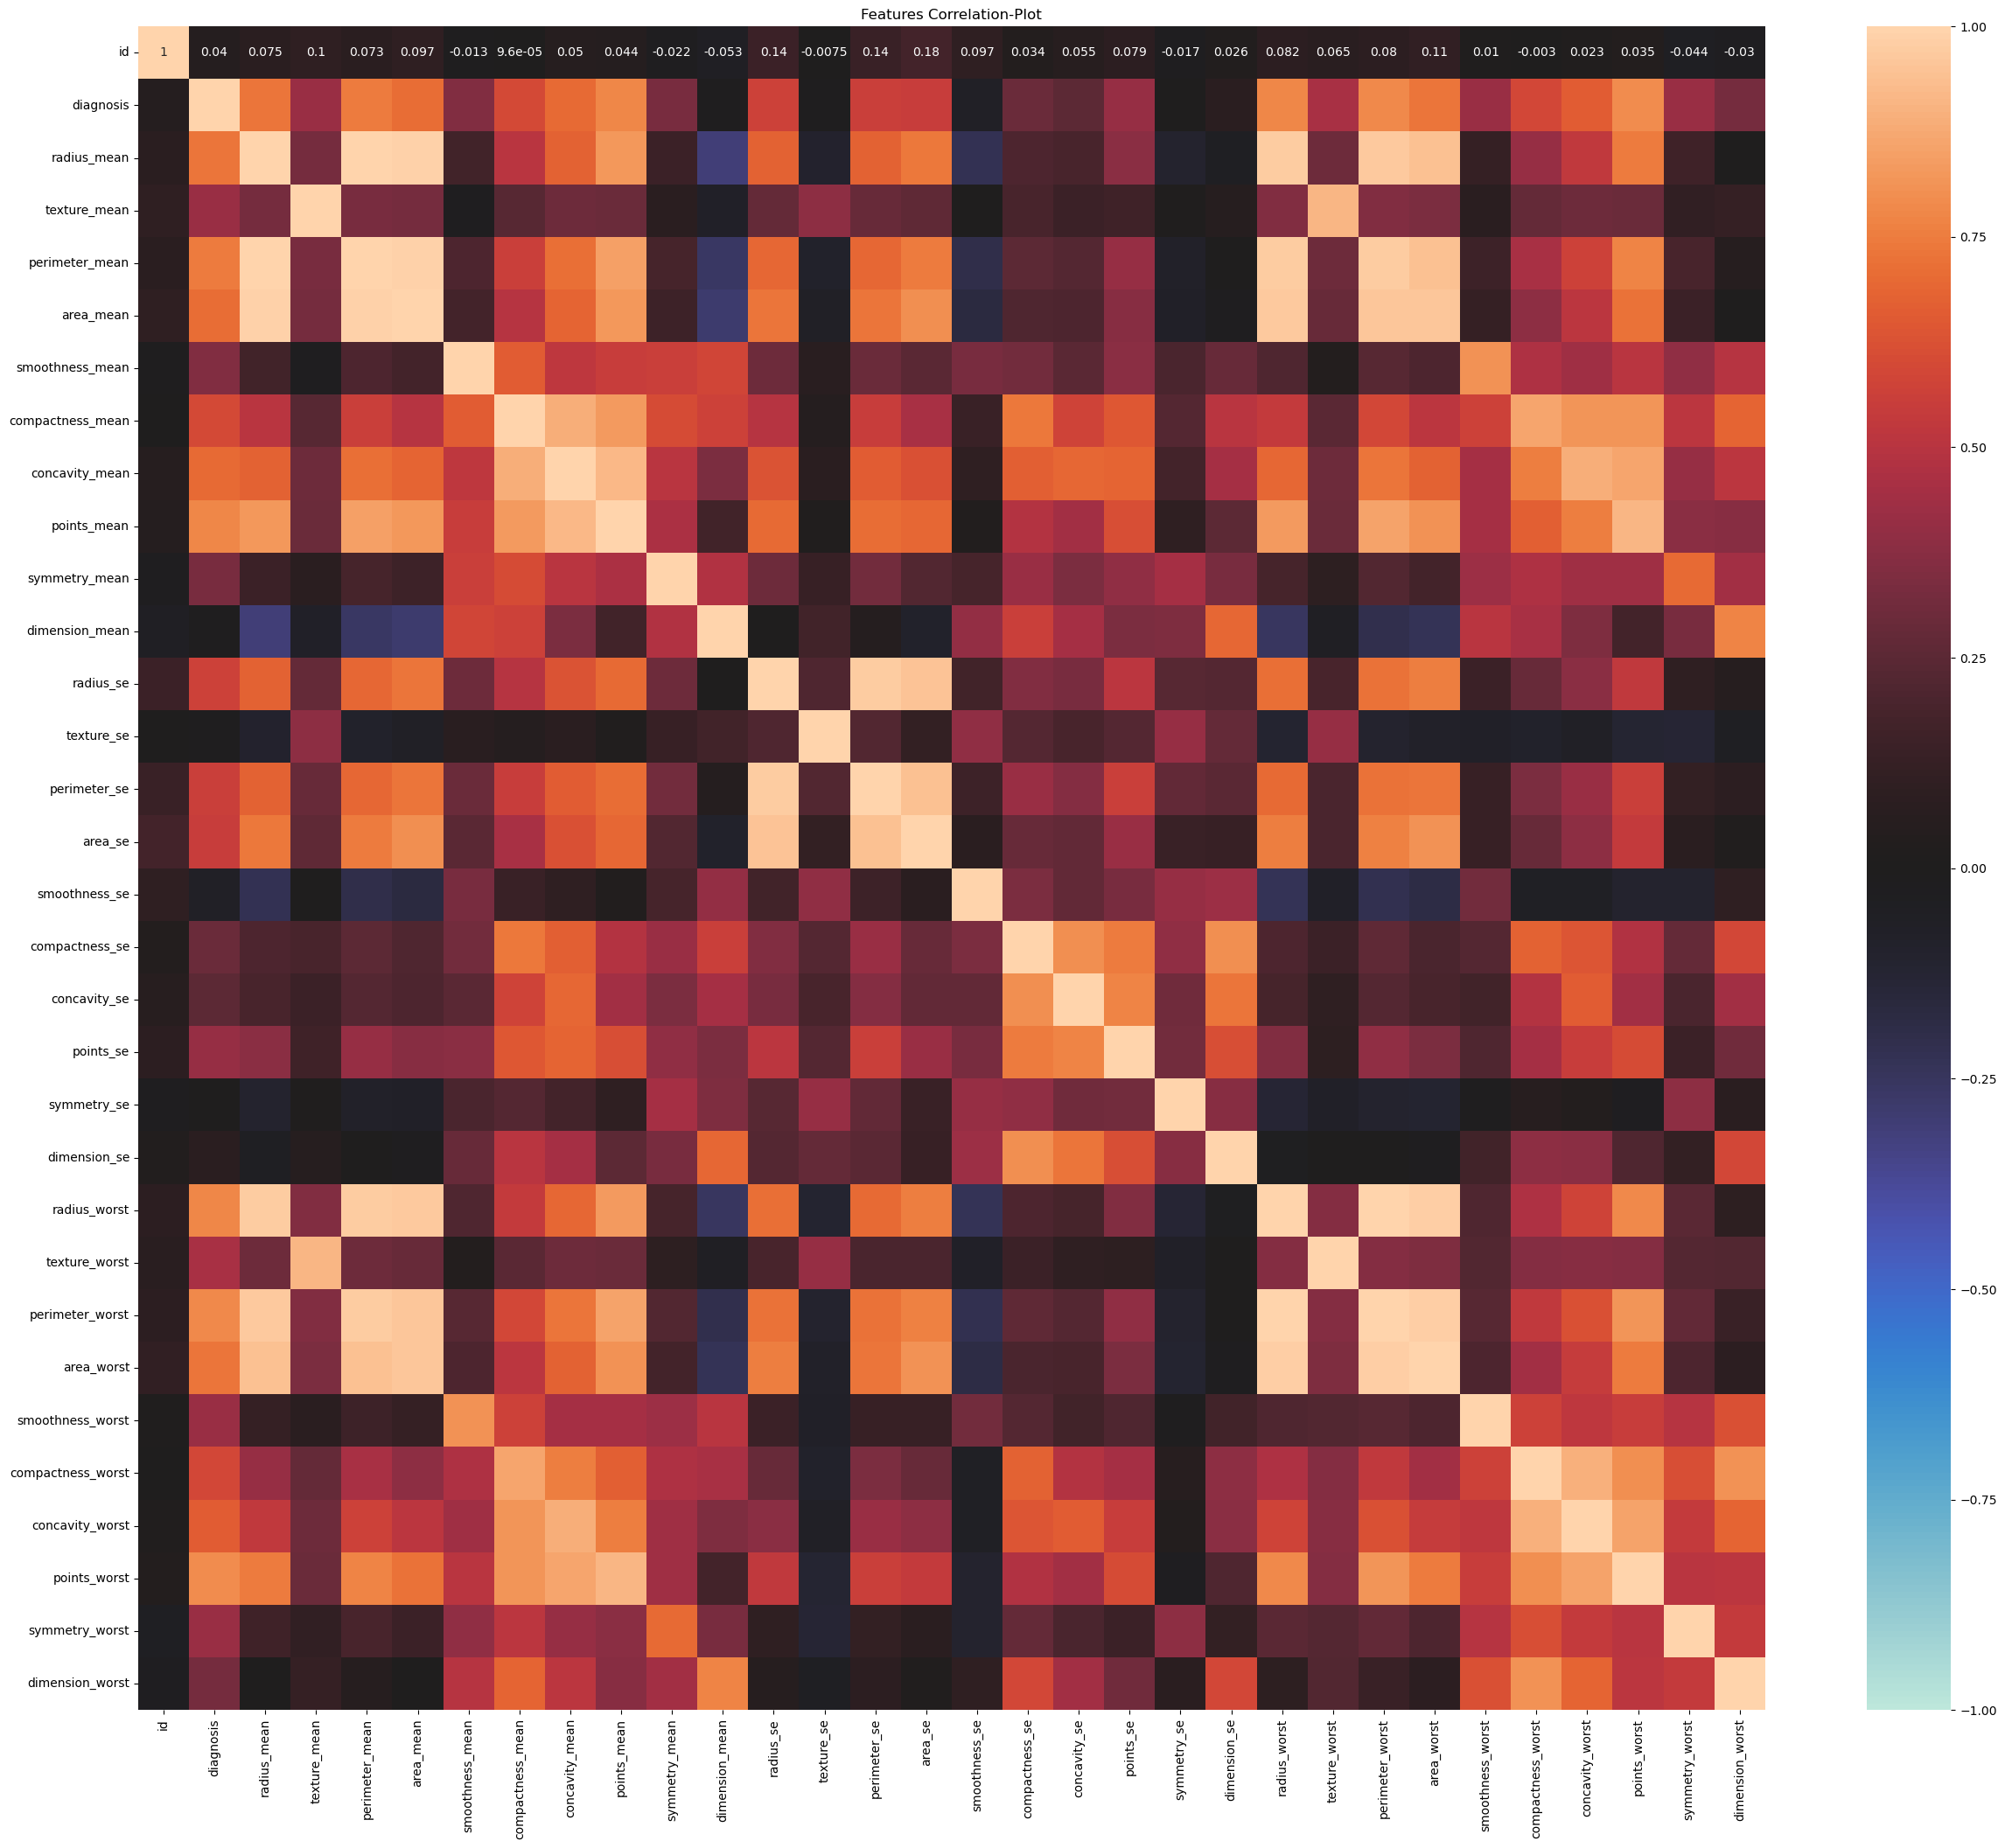

In [49]:
#checking correlaton between features
features = data.columns
plt.figure(figsize=[30,25])
plt.title('Features Correlation-Plot')
sns.heatmap(data[features].corr(), vmin=-1, vmax=1, center=0, annot=True)
plt.show()

In [18]:
#Droping Duplicates
data.drop_duplicates(inplace=True)
target='diagnosis'

In [19]:
#checking outliers
def boxPlot(dff):
    d = dff.drop(columns=['diagnosis'])
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d, palette="colorblind")

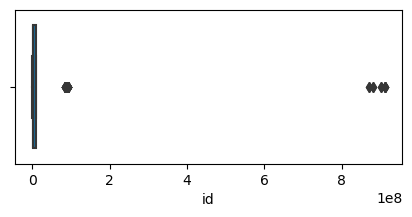

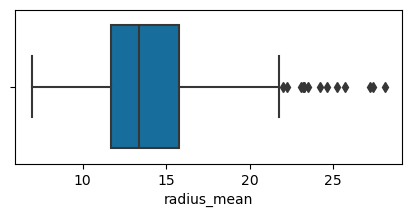

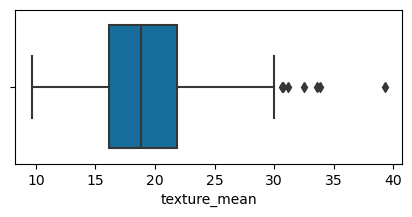

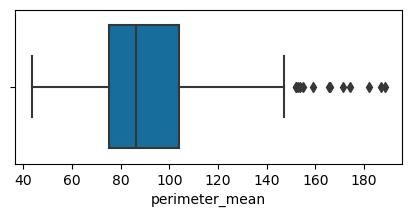

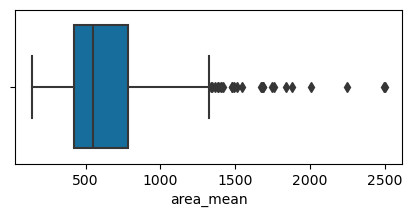

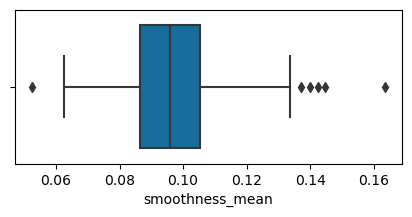

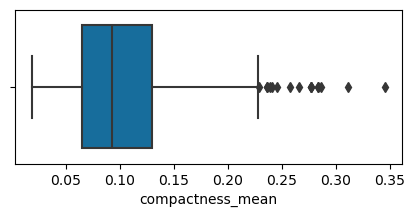

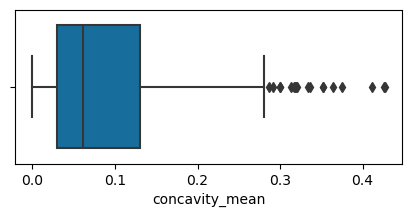

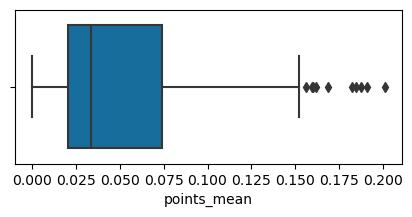

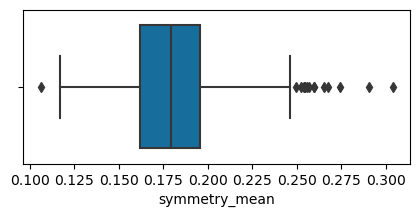

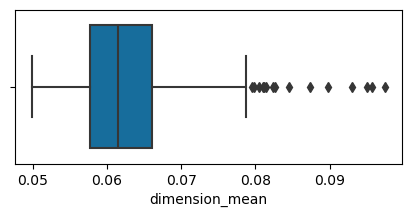

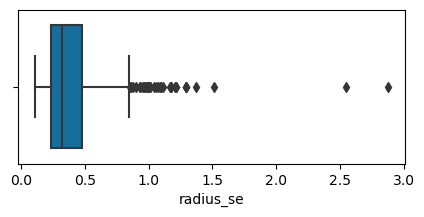

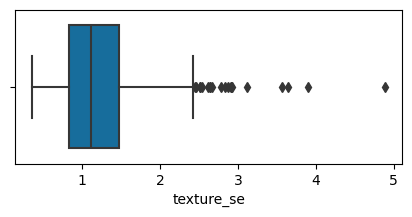

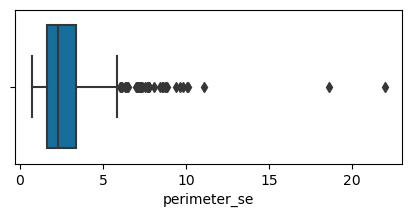

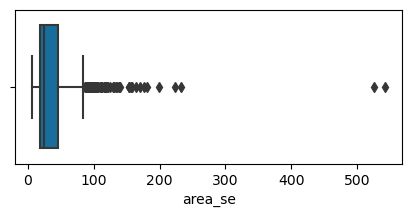

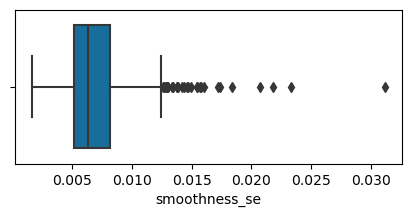

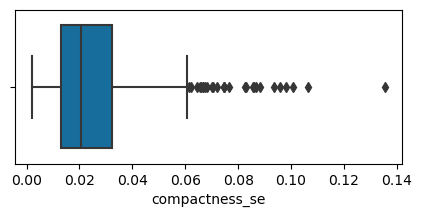

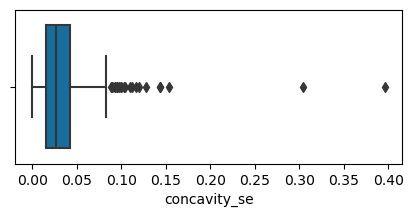

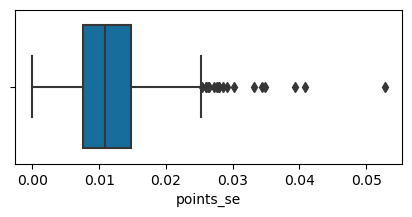

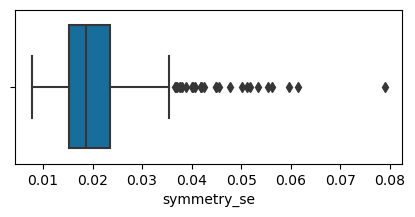

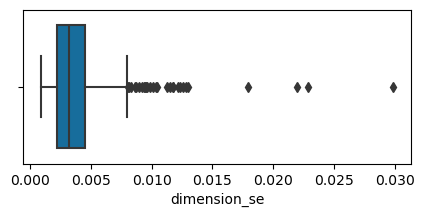

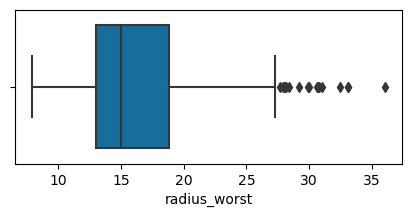

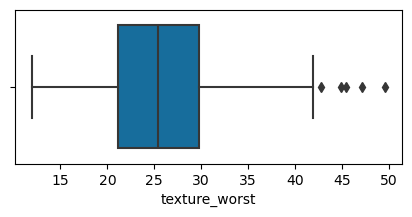

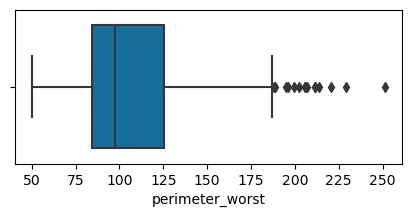

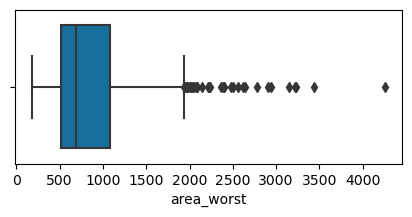

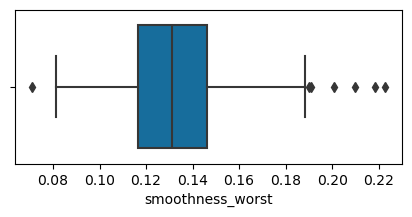

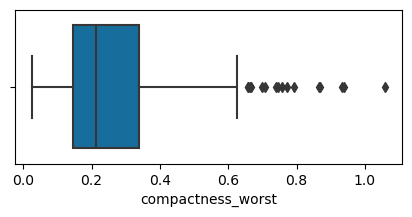

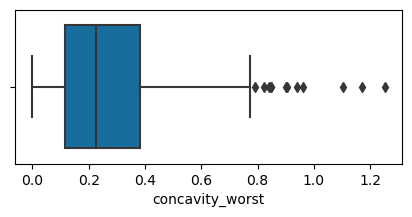

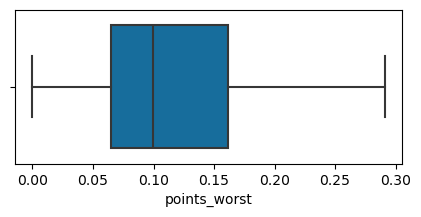

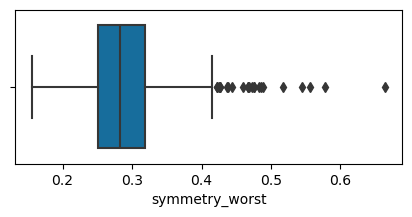

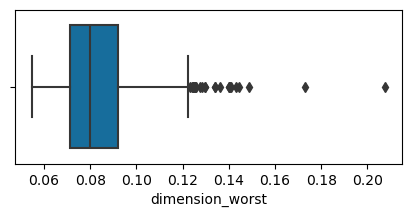

In [20]:
boxPlot(data)

# Removel outliers


In [21]:
Q1 = x.quantile(0.15)
Q3 = x.quantile(0.85)
inter_quartile_range = Q3 - Q1

In [22]:
data_out = data[~((x< (Q1 - (1.5 * inter_quartile_range))) | (x > (Q3 + (1.5 * inter_quartile_range)))).any(axis=1)]
data.shape, data_out.shape

((569, 32), (513, 32))

In [23]:
#after droping features id and diagnosis
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import random
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from random import seed
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Spliting the data into training and testing

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)

In [52]:
std = StandardScaler()


x_train_std = std.fit_transform(x_train)
x_train_std = pd.DataFrame(x_train_std, columns=x.columns)


x_test_std = std.transform(x_test)
x_test_std = pd.DataFrame(x_test_std, columns=x.columns)
print(x_train_std.shape)

(571, 30)


# Principal Component Analysis(PCA) for dimension reduction

In [51]:
# Dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)
print(x_train_pca.shape)

(571, 7)


#  RandomForestClassifier

In [28]:
rf = RandomForestClassifier()

param_grid = {
    'bootstrap' : [True, False],
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', 'auto'],
    'max_depth': [None, 10, 20,50,100,200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


Random_search = RandomizedSearchCV(rf, param_grid, n_iter=50, cv=10, n_jobs=-1,scoring='roc_auc')


Random_search.fit(x_train_pca, y_train)


best_params = Random_search.best_params_
best_score = Random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

clf_rf = Random_search.best_estimator_

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 100, 'bootstrap': False}
Best Score: 0.9904068286054019


Random Forest Accuracy: 0.951048951048951
Random Forest AUC Score: 0.9512961508248232
[[64  3]
 [ 4 72]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.96      0.95      0.95        76

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



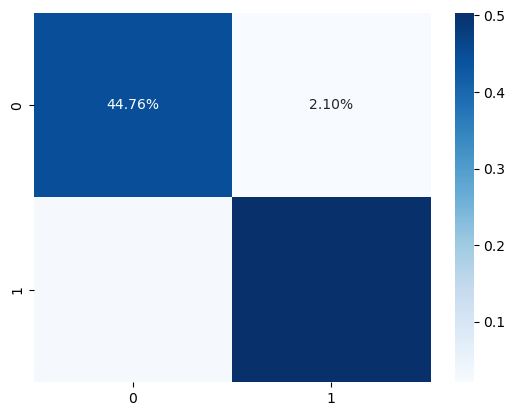

In [29]:
rf_pred = clf_rf.predict(x_test_pca)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest AUC Score:", rf_auc)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
# Displaying confusion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Blues')
plt.show()


In [53]:
64/(64+3+72+4)

0.44755244755244755

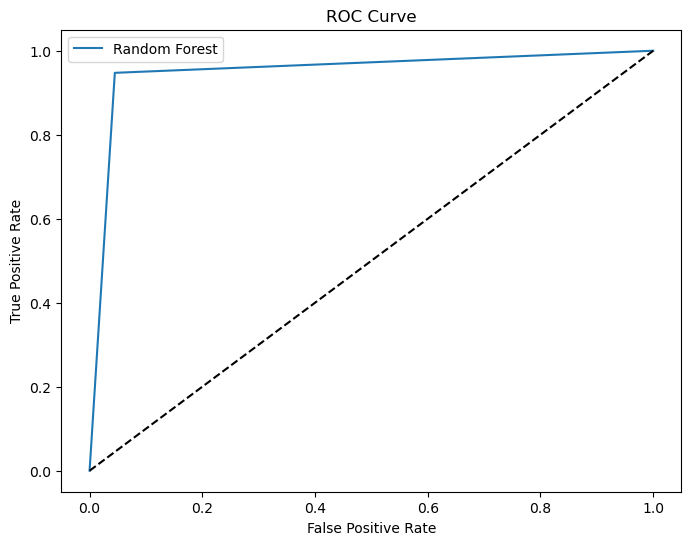

In [30]:
# Plotting ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# VarImpPlot(Variable importance Plot for Random Forest)

In [31]:
feature_importance = clf_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

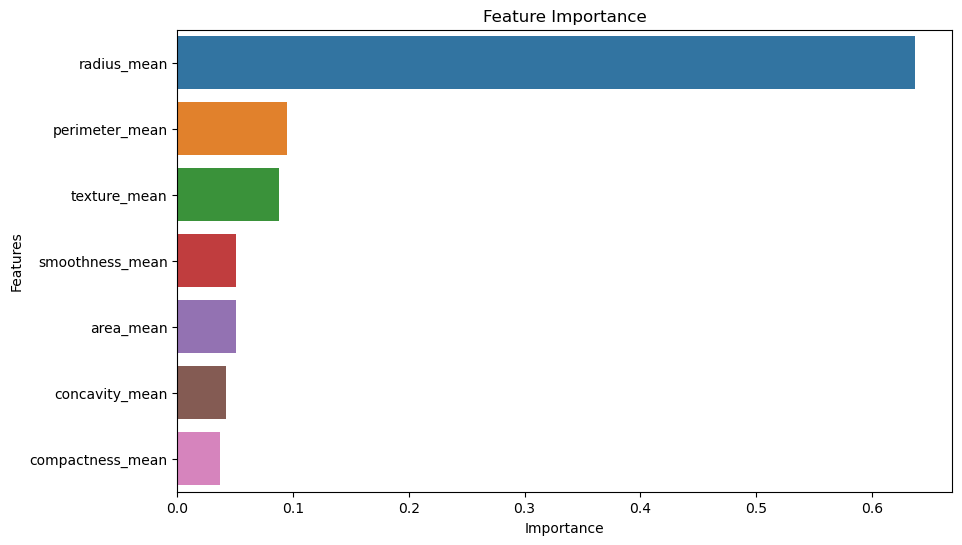

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance[sorted_idx], y=x.columns[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [33]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# DecisionTreeClassifier

Training set accuracy: 100.0000
Test set accuracy: 95.1049
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.94      0.97      0.95        76

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



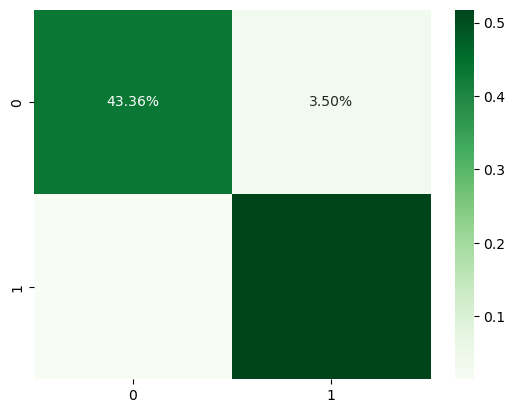

In [34]:
#By entropy
model=tree.DecisionTreeClassifier(criterion='entropy', splitter='best',random_state=123)
model.fit(x_train_std,y_train)
predictions=model.predict(x_test_std)
cm = confusion_matrix(y_test, predictions)
print('Training set accuracy: {:.4f}'.format(model.score(x_train_std, y_train)*100))
print('Test set accuracy: {:.4f}'.format(model.score(x_test_std, y_test)*100))
print(classification_report(y_test, predictions))
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Greens')
plt.show()

In [35]:
# Calculating accuracy and AUC score for Decision Tree (entropy)
dt_entropy_accuracy = accuracy_score(y_test, predictions)
dt_entropy_auc = roc_auc_score(y_test, predictions)

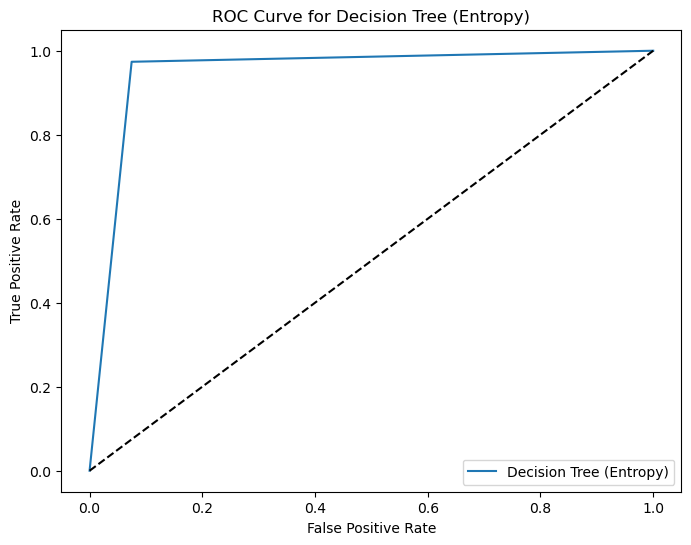

Decision Tree (Entropy) Accuracy: 0.951048951048951
Decision Tree (Entropy) AUC Score: 0.9495286724273371


In [36]:
# Plotting ROC curve for Decision Tree (entropy)
fpr_dt_entropy, tpr_dt_entropy, _ = roc_curve(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_entropy, tpr_dt_entropy, label="Decision Tree (Entropy)")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree (Entropy)")
plt.legend()
plt.show()
# Displaying accuracy and AUC score for Decision Tree (entropy)
print("Decision Tree (Entropy) Accuracy:", dt_entropy_accuracy)
print("Decision Tree (Entropy) AUC Score:", dt_entropy_auc)

[[66  1]
 [ 3 73]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.99      0.96      0.97        76

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



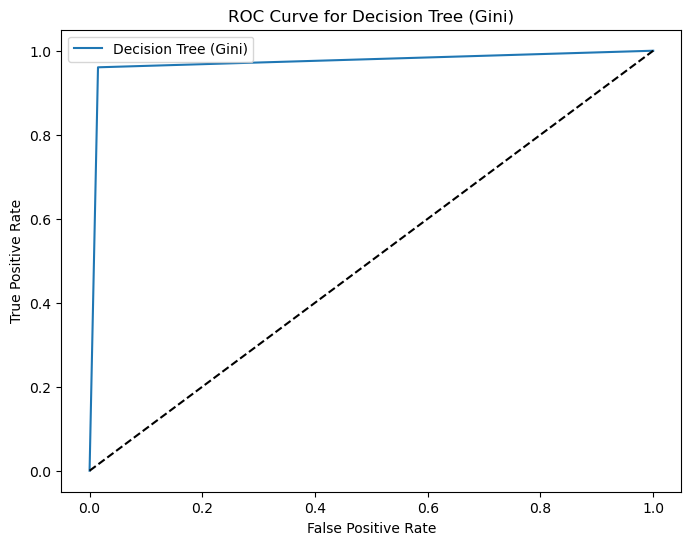

Decision Tree (Gini) Accuracy: 0.972027972027972
Decision Tree (Gini) AUC Score: 0.9728004713275726


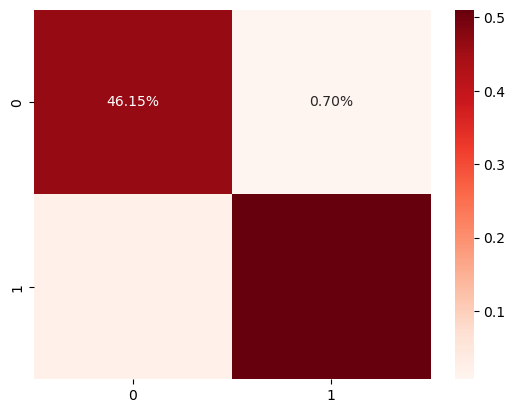

In [37]:
# Initializing and fitting the Decision Tree Classifier (using gini criterion)
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=123)
dt_gini.fit(x_train_std, y_train)

# Making predictions for Decision Tree (gini)
dt_gini_pred = dt_gini.predict(x_test_std)

# Calculating accuracy and AUC score for Decision Tree (gini)
dt_gini_accuracy = accuracy_score(y_test, dt_gini_pred)
dt_gini_auc = roc_auc_score(y_test, dt_gini_pred)
print(confusion_matrix(y_test, dt_gini_pred))
        
print(classification_report(y_test, dt_gini_pred))

# Plotting ROC curve for Decision Tree (gini)
fpr_dt_gini, tpr_dt_gini, _ = roc_curve(y_test, dt_gini_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_gini, tpr_dt_gini, label="Decision Tree (Gini)")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree (Gini)")
plt.legend()
plt.show()

# Displaying accuracy and AUC score for Decision Tree (gini)
print("Decision Tree (Gini) Accuracy:", dt_gini_accuracy)
print("Decision Tree (Gini) AUC Score:", dt_gini_auc)
cm = confusion_matrix(y_test, dt_gini_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Reds')
plt.show()

# Support Vector Machine Classifier (SVM)

[[65  2]
 [ 4 72]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.97      0.95      0.96        76

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



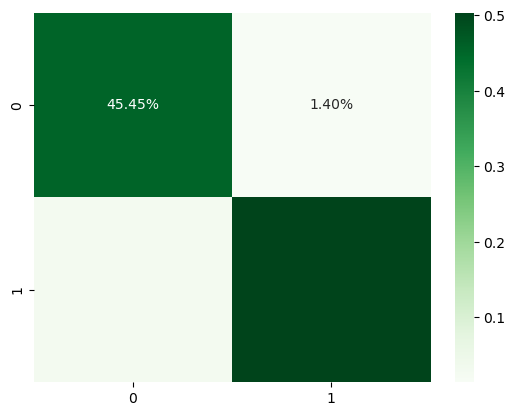

In [38]:
from sklearn.svm import SVC

SVM_model = SVC(probability=True).fit(x_train_pca, y_train)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": ["scale","auto"],
             "kernel": ["rbf","linear","poly","sigmoid"],
             "degree":[2,3,4]
             }



SVM_ = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=10, random_state=1)

SVM = SVM_.fit(x_train_pca, y_train).best_estimator_
pred_svm = SVM_.predict(x_test_pca)
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))
cm = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Greens')
plt.show()

# XGBoost Classifier

[[67  0]
 [ 2 74]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.97      0.99        76

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



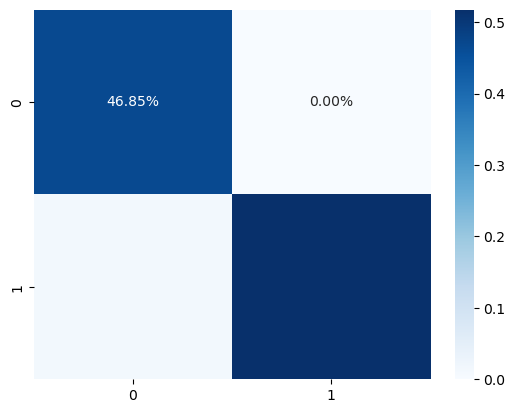

In [39]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}
xgb_model = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=10, random_state=1)
XGB = xgb_model.fit(x_train_std, y_train, eval_metric='logloss')#.best_estimator_
pred_xgb = xgb_model.predict(x_test_std)
print(confusion_matrix(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))
cm = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Blues')
plt.show()

# ANN (Artificial Neural Network) Classifier

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
model = Sequential([
    Dense(16, activation='relu', input_dim=7),
    (Dropout(0.2)),

    Dense(8, activation='relu'),
    (Dropout(0.2)),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(x_train_pca, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5663 - loss: 0.7720 - val_accuracy: 0.8087 - val_loss: 0.5752
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6684 - loss: 0.6275 - val_accuracy: 0.8261 - val_loss: 0.5066
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6738 - loss: 0.6141 - val_accuracy: 0.8609 - val_loss: 0.4522
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7257 - loss: 0.5339 - val_accuracy: 0.8696 - val_loss: 0.4060
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7828 - loss: 0.5212 - val_accuracy: 0.9043 - val_loss: 0.3657
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8633 - loss: 0.4393 - val_accuracy: 0.9304 - val_loss: 0.3274
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8211 - loss: 0.4138 - val_accuracy: 0.9304 - val_loss: 0.2944
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8557 - loss: 0.3532 - val_accuracy: 0.9304 - 

In [43]:
y_pred = model.predict(x_test_pca)
y_pred = (y_pred > 0.5)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [44]:
y_pred = model.predict(x_test_pca)
y_pred = (y_pred > 0.5)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[67  0]
 [ 3 73]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.96      0.98        76

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



# Result

Random Forest Accuracy: 0.9440559440559441


Random Forest AUC Score: 0.943833464257659

Decision Tree (Entropy) Accuracy: 0.951048951048951

Decision Tree (Gini) Accuracy: 0.972027972027972

SVM  Accuracy: 0.96

XGBoost Accuracy: 0.99

Neural Network Accuracy: 0.972027972027972

 we noticed that XGBoost has highest Accuracy.

we balanced the target variable, removal of highly correlated features, implementation of three algorithms (Random Forest, Decision Tree, Neural Network), ROC curve for Random Forest,SVM and XGBoost and a report on the results including accuracy, AUC score, and confusion matrix.